# Q3.7: CNN on CIFAR-100 – Optimizer Comparison
Compare optimizers on the CIFAR-100 dataset (100 classes) using the same CNN architecture.

**Examiner expectations:** show training/validation curves, compare final test accuracy, and summarize which optimizer converges better.

## Step 1: Import Libraries and Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Load CIFAR-100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode (100 classes)
y_train_cat = to_categorical(y_train, 100)
y_test_cat = to_categorical(y_test, 100)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]}")
print(f"Number of classes: 100")

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
Training samples: 50000
Test samples: 10000
Image shape: (32, 32, 3)
Number of classes: 100


## Step 2: Define CNN Architecture

In [2]:
def build_cnn():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])
    return model

print("CNN architecture defined")

CNN architecture defined


## Step 3: Define Optimizers to Compare

In [3]:
optimizers = {
    'Adam': keras.optimizers.Adam(learning_rate=0.001),
    'SGD': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'RMSprop': keras.optimizers.RMSprop(learning_rate=0.001),
    'Adagrad': keras.optimizers.Adagrad(learning_rate=0.01)
}

print(f"Optimizers to compare: {list(optimizers.keys())}")

Optimizers to compare: ['Adam', 'SGD', 'RMSprop', 'Adagrad']


## Step 4: Train Models with Different Optimizers

In [4]:
histories = {}
test_results = {}

for opt_name, opt in optimizers.items():
    print(f"\n{'='*50}")
    print(f"Training with {opt_name}...")
    print(f"{'='*50}")

    model = build_cnn()
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train_cat,
                        batch_size=128,
                        epochs=20,
                        validation_split=0.2,
                        verbose=1)

    histories[opt_name] = history

    # Evaluate on test set
    loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
    test_results[opt_name] = {'loss': loss, 'accuracy': acc}

    print(f"{opt_name} Test Accuracy: {acc*100:.2f}%")

print("\n" + "="*50)
print("All optimizers trained!")
print("="*50)


Training with Adam...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 56ms/step - accuracy: 0.0219 - loss: 4.7913 - val_accuracy: 0.0175 - val_loss: 5.0186
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.0586 - loss: 4.1626 - val_accuracy: 0.1180 - val_loss: 3.7536
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.0841 - loss: 3.9245 - val_accuracy: 0.1175 - val_loss: 3.7824
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.1045 - loss: 3.7584 - val_accuracy: 0.1833 - val_loss: 3.3640
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.1323 - loss: 3.5900 - val_accuracy: 0.1869 - val_loss: 3.4042
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.1698 - loss: 3.3789 - val_accuracy: 0.2424 - val_loss: 3.0254
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.1949 - loss: 3.2397 - val_accuracy: 0.2833 - val_loss: 2.8458
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.2266 - loss: 3.0849 - val_acc

## Step 5: Plot Training Accuracy Comparison

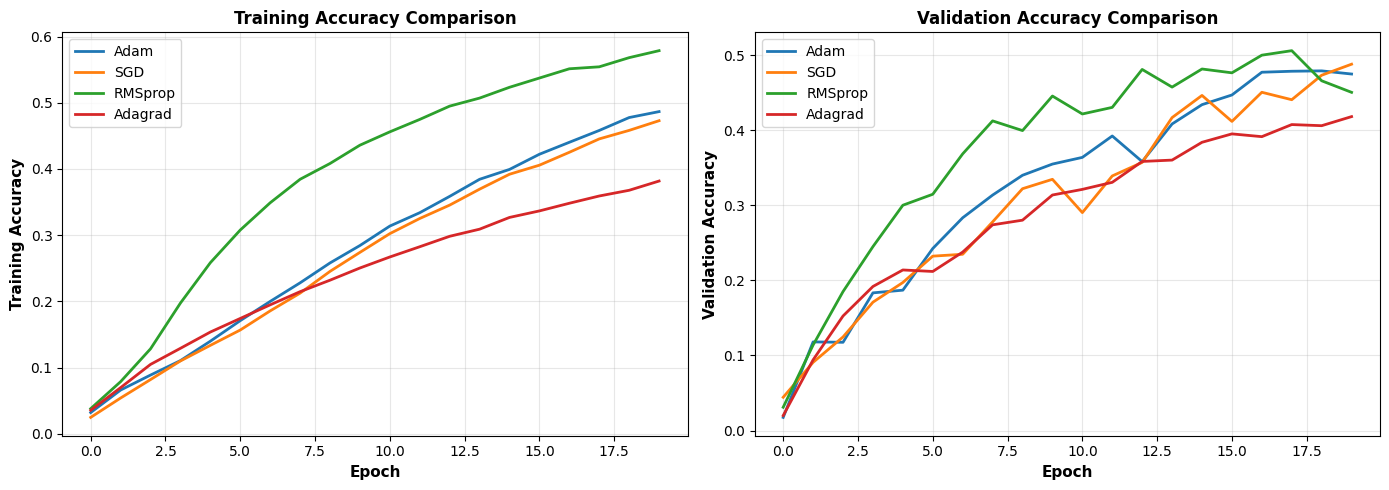

In [5]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for opt_name, history in histories.items():
    plt.plot(history.history['accuracy'], label=opt_name, linewidth=2)
plt.xlabel('Epoch', fontsize=11, fontweight='bold')
plt.ylabel('Training Accuracy', fontsize=11, fontweight='bold')
plt.title('Training Accuracy Comparison', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
for opt_name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=opt_name, linewidth=2)
plt.xlabel('Epoch', fontsize=11, fontweight='bold')
plt.ylabel('Validation Accuracy', fontsize=11, fontweight='bold')
plt.title('Validation Accuracy Comparison', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Plot Training Loss Comparison

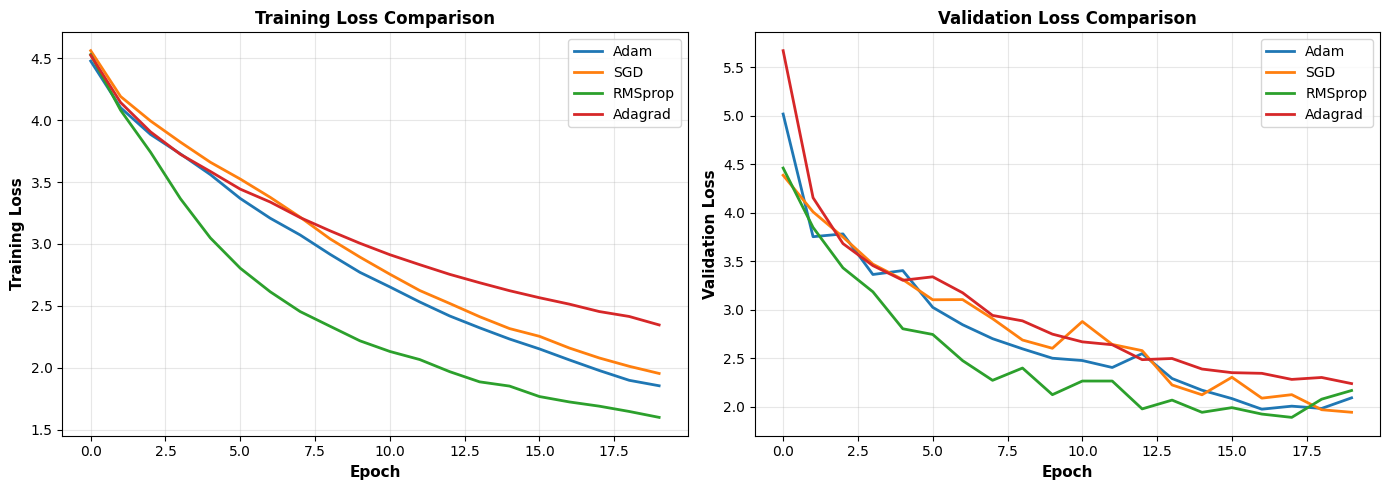

In [6]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for opt_name, history in histories.items():
    plt.plot(history.history['loss'], label=opt_name, linewidth=2)
plt.xlabel('Epoch', fontsize=11, fontweight='bold')
plt.ylabel('Training Loss', fontsize=11, fontweight='bold')
plt.title('Training Loss Comparison', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
for opt_name, history in histories.items():
    plt.plot(history.history['val_loss'], label=opt_name, linewidth=2)
plt.xlabel('Epoch', fontsize=11, fontweight='bold')
plt.ylabel('Validation Loss', fontsize=11, fontweight='bold')
plt.title('Validation Loss Comparison', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 7: Test Accuracy Bar Chart

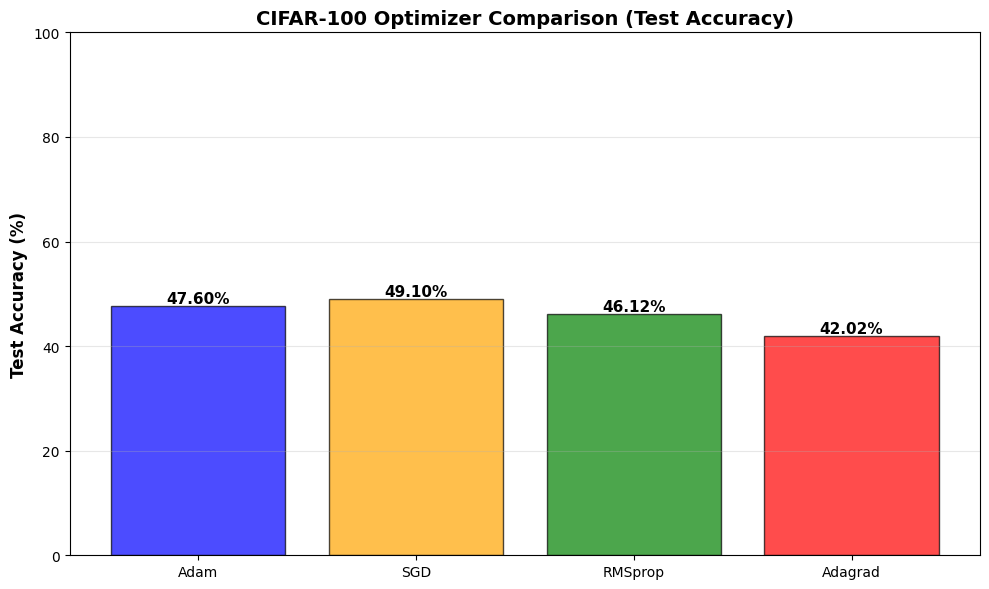


Best Optimizer: SGD (49.10%)


In [7]:
opt_names = list(test_results.keys())
accuracies = [test_results[name]['accuracy'] * 100 for name in opt_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(opt_names, accuracies, color=['blue', 'orange', 'green', 'red'],
               alpha=0.7, edgecolor='black')
plt.ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('CIFAR-100 Optimizer Comparison (Test Accuracy)', fontsize=14, fontweight='bold')
plt.ylim([0, 100])

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

best_optimizer = max(test_results, key=lambda x: test_results[x]['accuracy'])
print(f"\nBest Optimizer: {best_optimizer} ({test_results[best_optimizer]['accuracy']*100:.2f}%)")

## Step 8: Summary Table

In [8]:
import pandas as pd

summary_data = []
for opt_name in test_results.keys():
    summary_data.append({
        'Optimizer': opt_name,
        'Test Accuracy': f"{test_results[opt_name]['accuracy']*100:.2f}%",
        'Test Loss': f"{test_results[opt_name]['loss']:.4f}",
        'Final Train Acc': f"{histories[opt_name].history['accuracy'][-1]*100:.2f}%",
        'Final Val Acc': f"{histories[opt_name].history['val_accuracy'][-1]*100:.2f}%"
    })

summary_df = pd.DataFrame(summary_data)
print("\n=== CIFAR-100 OPTIMIZER COMPARISON RESULTS ===")
print(summary_df.to_string(index=False))


=== CIFAR-100 OPTIMIZER COMPARISON RESULTS ===
Optimizer Test Accuracy Test Loss Final Train Acc Final Val Acc
     Adam        47.60%    2.0520          48.67%        47.47%
      SGD        49.10%    1.9015          47.30%        48.78%
  RMSprop        46.12%    2.1334          57.88%        45.03%
  Adagrad        42.02%    2.2170          38.18%        41.80%


## Summary

**CIFAR-100 Challenge:**
- 100 fine-grained classes (vs 10 in CIFAR-10)
- Requires more complex model architecture
- Harder to achieve high accuracy

**Optimizer Observations:**
- **Adam**: Usually fastest convergence, good default choice
- **SGD with Momentum**: May achieve better final accuracy with proper tuning
- **RMSprop**: Adaptive learning rate, works well for CNNs
- **Adagrad**: Learning rate decays, may converge slower

**Key Takeaways:**
- More classes require deeper networks and more training
- Batch normalization + Dropout help prevent overfitting
- Optimizer choice impacts both speed and final performance